In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
print("Imports successful")

Imports successful


In [2]:
news = pd.read_csv("data/news.csv")
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [4]:
news['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [5]:
options = ['REAL', 'FAKE']
news = news.loc[news['label'].isin(options)]

In [6]:
news['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

Text(0, 0.5, 'News Type')

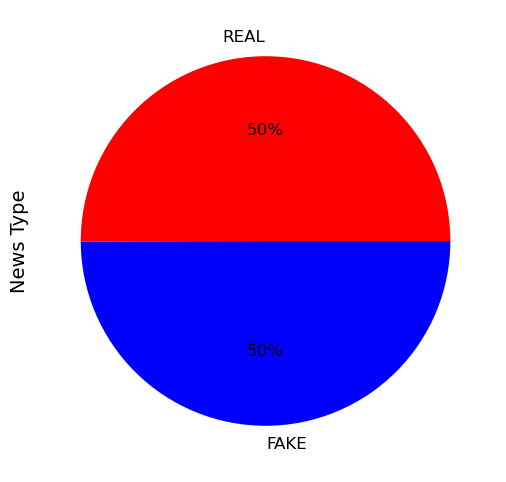

In [7]:
# Visualize the distribution
news.label.value_counts().plot(kind='pie', autopct='%1.0f%%',
                    fontsize=12, figsize=(9,6), colors=["red", "blue"])
plt.ylabel('News Type', size=14)

## dataset articles equally distributed between real news and fake news

In [8]:
# Divide Dataset into features and labels
# Features only include the text not the title of the article
features = news.loc[:, 'text'].values
labels = news.loc[:, 'label'].values

In [9]:
# Split into training and test data (80/20 split)

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(
    news['text'],labels, test_size=0.2, random_state=7)

Tf-Idf scores words the highest that occur often in a single article but are rare among all documents. This gets rid of stop words, e.g. the, a, is..., while promoting those words that have true meaning and change the content of the article.

In [10]:
# Use TF-IDF to convert text features into vectors
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=('english'), max_df=0.7)

# Fit and transform training and test data sets
tfidf_train = tfidf_train = vectorizer.fit_transform((x_training_data).astype('U'))
tfidf_test = vectorizer.transform(x_test_data)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jonasmaximilian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Passive Agressive Classifier

Optimization of Perzeptron Classifier for data that is linearly divideable.
Learns a weight for every feature (in this case for every word) and adjusts it for every new instance in the training data. 
Every feature gets multiplied with the correspondent feature weight. If the sum of these products is greater 0 we give the text the label TRUE otherwise the label FALSE  

### Difference to Perzeptron Classifier
1. Unlike Perzeptron, the passive agressive classifier includes a regularization parameter. This parameter controls the trafeoff between increasing the margin size and ensuring the classifier doesn't misclassify training examples.
1. Passive Agressive Classifier only updates their model when there is a mistake, rather than every instance (like Perzeptron)

### Usage
Performs best in text categorization and collavorative filtering tasks

In [11]:
#Approach 1: Passive Agressive Classifier
pa = PassiveAggressiveClassifier(max_iter=50)
# Train model on training data
pa.fit(tfidf_train, y_training_data)
# Make predictions
predictions_pa = pa.predict(tfidf_test)

In [12]:
pa = accuracy_score(y_test_data, predictions_pa)
print(f'Accuracy: {round(pa*100,2)}%')

Accuracy: 92.34%


In [13]:
# Evaluate performance of the model
print(classification_report(y_test_data, predictions_pa))

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.92       638
        REAL       0.92      0.93      0.92       629

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



# Logistic Regression Model

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

Logit(pi) = 1/(1+ exp(-pi))

ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k

### Logistic- vs Linear Regression

Both linear and logistic regression are among the most popular models within data science, and open-source tools, like Python and R, make the computation for them quick and easy.

Linear regression models are used to identify the relationship between a continuous dependent variable and one or more independent variables. When there is only one independent variable and one dependent variable, it is known as simple linear regression, but as the number of independent variables increases, it is referred to as multiple linear regression. For each type of linear regression, it seeks to plot a line of best fit through a set of data points, which is typically calculated using the least squares method.

Similar to linear regression, logistic regression is also used to estimate the relationship between a dependent variable and one or more independent variables, but it is used to make a prediction about a categorical variable versus a continuous one. A categorical variable can be true or false, yes or no, 1 or 0, et cetera. The unit of measure also differs from linear regression as it produces a probability, but the logit function transforms the S-curve into straight line.  

While both models are used in regression analysis to make predictions about future outcomes, linear regression is typically easier to understand. Linear regression also does not require as large of a sample size as logistic regression needs an adequate sample to represent values across all the response categories. Without a larger, representative sample, the model may not have sufficient statistical power to detect a significant effect.

In [14]:
# Approach 2: Logistic Regression Model
model_lr = LogisticRegression(max_iter=150)
# Train model on training data
model_lr.fit(tfidf_train, y_training_data)
# Make prediction on test data
predictions_lr = model_lr.predict(tfidf_test)

In [15]:
lr = accuracy_score(y_test_data, predictions_lr)
print(f'Accuracy: {round(lr*100,2)}%')

Accuracy: 91.71%


In [16]:
# Evaluate performance of this model
print(classification_report(y_test_data, predictions_lr))

              precision    recall  f1-score   support

        FAKE       0.90      0.94      0.92       638
        REAL       0.94      0.89      0.91       629

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



# Support Vector Machine (SVM)

Support Vector Machine (SVM) is a robust classification and regression technique that maximizes the predictive accuracy of a model without overfitting the training data. SVM is particularly suited to analyzing data with very large numbers (for example, thousands) of predictor fields.

In [17]:
# Approach 3: Support Vector Machine
model_sv = SVC()
# Train model on training data
model_sv.fit(tfidf_train, y_training_data)
# Make predictions
predictions_sv = model_sv.predict(tfidf_test)

In [18]:
sv = accuracy_score(y_test_data, predictions_sv)
print(f'Accuracy: {round(sv*100, 2)}%')

Accuracy: 92.9%


In [19]:
print(classification_report(y_test_data, predictions_sv))

              precision    recall  f1-score   support

        FAKE       0.91      0.95      0.93       638
        REAL       0.95      0.91      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [21]:
# Approach 4: Random Forrest Model
model_rf = RandomForestClassifier(n_estimators=200, random_state=0)
# Train model on training data
model_rf.fit(tfidf_train, y_training_data)
# Make predictions
predictions_rf = model_rf.predict(tfidf_test)

In [22]:
rf = accuracy_score(y_test_data, predictions_rf)
print(f'Accuracy: {round(rf*100,2)}%')

Accuracy: 90.13%


In [23]:
print(classification_report(y_test_data, predictions_rf))

              precision    recall  f1-score   support

        FAKE       0.90      0.90      0.90       638
        REAL       0.90      0.90      0.90       629

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



In [24]:
# Show accuracy scores for each model
models = pd.DataFrame({
    'Model': ['Passive Aggressive Classifier', 'Logistic Regression', 
             'Support Vector Machine', 'Random Forest'],
    'Accuracy_score': [pa, lr, sv, rf]
})
models

,Model,Accuracy_score
0,Passive Aggressive Classifier,0.923441
1,Logistic Regression,0.917127
2,Support Vector Machine,0.928966
3,Random Forest,0.901342


,Model,Accuracy_score
2,Support Vector Machine,0.928966
0,Passive Aggressive Classifier,0.923441
1,Logistic Regression,0.917127
3,Random Forest,0.901342


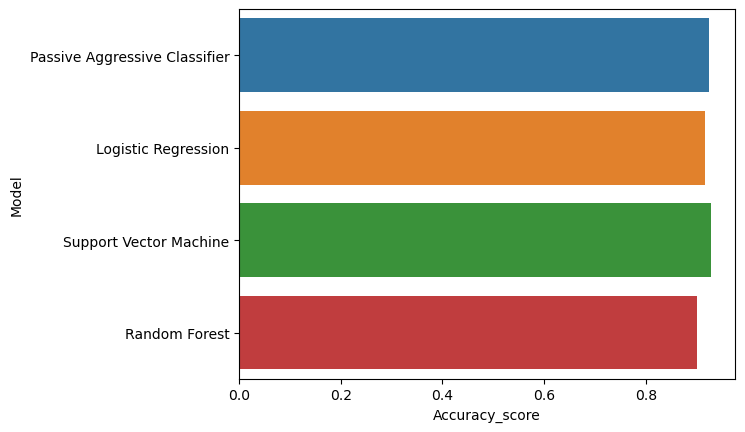

In [25]:
sns.barplot(x='Accuracy_score', y='Model', data=models)
models.sort_values(by='Accuracy_score', ascending=False)